In [18]:
## 추출한 csv합치기 ##

import os
import pandas as pd

# 합칠 CSV 파일들이 들어있는 폴더 경로
folder_path = 'revwNum'

# # 모든 파일을 저장할 빈 DataFrame 생성을 위한 리스트
dfs = []
# 폴더 내의 모든 파일에 대해 반복
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):  # 확장자가 .csv인 파일만 처리
        file_path = os.path.join(folder_path, file_name)
        # CSV 파일을 DataFrame으로 읽기
        df = pd.read_csv(file_path)
        # 필요한 컬럼만 선택
        df = df[['', 'revwNum','revwRvgr']]
        # DataFrame을 리스트에 추가
        dfs.append(df)
# 리스트에 저장된 모든 DataFrame을 하나로 합치기
combined_df = pd.concat(dfs, ignore_index=True)
# 모든 데이터를 담은 하나의 CSV 파일로 저장
combined_df.to_csv("final_plz/5years.csv", encoding='utf-8', index=False)

In [25]:
import pandas as pd

# 대규모 CSV 파일을 조각 내어 읽기
chunk_size = 10000  # 한 번에 읽을 행의 개수
file_path = 'final_plz/5years_fix_all.csv'

# 첫 번째 조각을 읽어와서 컬럼 이름 변경
reader = pd.read_csv(file_path, chunksize=chunk_size)
for i, chunk in enumerate(reader):
    # 컬럼 이름 변경
    new_column_names = [,'saleCmdtid', 'cmdtName', 'revwNum', 'revwCntt', 'revwScore']
    chunk.columns = new_column_names
    
    # 변경된 조각을 새로운 파일에 추가(첫 번째 조각은 새로 쓰고, 이후 조각은 append 모드로 쓰기)
    if i == 0:
        chunk.to_csv('final_plz/5years_fix_all_name.csv', index=False)
    else:
        chunk.to_csv('final_plz/5years_fix_all_name.csv', mode='a', header=False, index=False)

print("Column names have been changed successfully!")


Column names have been changed successfully!


In [12]:
import pandas as pd

# CSV 파일을 읽어와 데이터프레임으로 변환
df = pd.read_csv("final_plz/null_utf8.csv")
df = df[['ISBN','saleCmdtid', 'cmdtName', 'revwNum', 'revwCntt', 'revwScore','reviewRecommendCount']]

# 'isbn', 'saleCmdtid', 'title', 'review_id', 'comment','review_score','review_like_count'

# 중복된 revwNum을 가지고 있는 행 중 하나만 남기고 나머지는 삭제
df.drop_duplicates(subset=['revwNum'], keep='first', inplace=True)

# 변경된 데이터프레임을 새로운 CSV 파일로 저장
df.to_csv("final_plz/null_utf8_2.csv", encoding = 'utf-8',index=False)
df


,ISBN,saleCmdtid,cmdtName,revwNum,revwCntt,revwScore,reviewRecommendCount
0,9.791190e+12,S000001938499,1cm 다이빙,5415919,나 자신이 행복한 법에 대해 고민해 볼 수 있는 책이었습니다.\r\n책을 읽고 행복...,10,62
1,9.791190e+12,S000001938499,1cm 다이빙,5416113,글귀가 마음에 와 닿아요,10,60
2,9.791190e+12,S000001938499,1cm 다이빙,5416037,나름 젊은이가 쓴 나름 조숙한 이야기 \r\n가볍게 읽다 울뻔? 울었다,10,58
3,9.791190e+12,S000001938499,1cm 다이빙,5416101,배송받고 하루만에 다읽었어요 매우공감되고 와닿는말이 많았어요 읽고나니 위로가되는책이...,10,56
4,9.791190e+12,S000001938499,1cm 다이빙,5416004,잘읽혀서 한번에읽었어요. 두고두고 복잡할때 읽을까해요,10,55
...,...,...,...,...,...,...,...
76654,9.791164e+12,S000001825766,흔한남매 1,4628027,아이가 좋아해요 잘 읽히고 내용이 재미있나봐요,10,0
76655,9.791164e+12,S000001825766,흔한남매 1,4628884,7살 아이가 좋아해요,10,0
76656,9.791164e+12,S000001825766,흔한남매 1,4628610,아이가 흔한남매 시리즈는 모두 좋아해요,10,0
76657,9.791164e+12,S000001825766,흔한남매 1,4628497,초딩 아들 너무 재밌어하네요.\r\n박장대소.ㅋ\r\n배송도 빨라요,10,0


In [12]:
df

,saleCmdtid,cmdtName,revwNum,revwCntt,revwRvgr
0,S000000735420,104층 나무 집,1436917,13층부터 계속해서 읽고 있는데 재미있어하네요.,4
1,S000000735420,104층 나무 집,1437020,아이가 너무 좋아하는 책,4
2,S000000735420,104층 나무 집,1436576,아이가 너무 좋아해요,4
3,S000000735420,104층 나무 집,1436607,나무집 시리즈 정말 재미있게 읽고 있어요. 104층도 기대하며 읽어보려고 구입했습니다.,4
4,S000000735420,104층 나무 집,13293001,책이 두꺼워도 술술 읽혀요. 내용이 재밌는지 푹 빠져서 읽어요,4
...,...,...,...,...,...
33744,S000001825993,흔한남매 안 흔한 일기 1,4638060,조카가 엄청 좋아합니다. 제가 봐도 재미있어요.,4
33745,S000001825993,흔한남매 안 흔한 일기 1,4638102,아이가 좋아해서 계속 구매합니다,4
33746,S000001825993,흔한남매 안 흔한 일기 1,4638148,좋아요,4
33747,S000001825993,흔한남매 안 흔한 일기 1,4638164,애들이 재미있게 읽으니깐 좋아요~,4


In [23]:
import chardet

# 기존 파일 열기
with open('final_plz/practice_final_D_null.csv', 'r', encoding='utf-8') as file:
    data = file.readlines()

# 각 줄의 인코딩을 감지하고, utf-8로 변환하여 저장
new_lines = []
for line in data:
    encoding = chardet.detect(line)['encoding']
    line_decoded = line.decode(encoding).encode('utf-8')
    new_lines.append(line_decoded)

# 새로운 파일에 쓰기
with open('new_file.csv', 'wb') as file:
    file.writelines(new_lines)

print("Encoding conversion completed successfully!")



UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 78: invalid start byte

In [4]:
import pandas as pd

# 첫 번째 CSV 파일 읽기
df1 = pd.read_csv('k_review_final_utf8.csv')

# 두 번째 CSV 파일 읽기
df2 = pd.read_csv('aladin_review.csv')

# 두 데이터프레임을 합치기
merged_df = pd.concat([df1, df2], ignore_index=True)

# 결과를 새로운 CSV 파일로 저장
merged_df.to_csv('review_merged_file.csv', encoding = 'utf-8', index=False)



In [5]:
merged_df.head(5)

,ISBN,cmdtName,revwScore,reviewRecommendCount,revwCntt,revwNum,isbn,title,review_rating,review_like_count,review_comment,paper_id
0,9.790000e+12,마법천자문 44: 죄를 씻어 내라! 목욕할 욕,10.0,0.0,0,1316001.0,NaN,NaN,NaN,NaN,NaN,NaN
1,9.790000e+12,"대변동: 위기, 선택, 변화",10.0,0.0,04-04,909679.0,NaN,NaN,NaN,NaN,NaN,NaN
2,9.790000e+12,팩트풀니스,10.0,0.0,1234567890,11616342.0,NaN,NaN,NaN,NaN,NaN,NaN
3,9.790000e+12,내게 무해한 사람,2.0,0.0,11111111111,1545516.0,NaN,NaN,NaN,NaN,NaN,NaN
4,9.790000e+12,일론 머스크,7.0,0.0,1.11E+11,13229101.0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv( "C:\\Users\\fx567\\Downloads\\A_reviews_all_clean_utf8.csv" )

# 변경할 컬럼 순서 정의
new_column_order = ['isbn', 'title',  'review_rating' , 'review_like_count', 'review_comment', 'paper_id']  # 새로운 순서를 지정합니다.

# 컬럼 순서 변경
df = df[new_column_order]

# 변경된 데이터프레임을 새로운 CSV 파일로 저장
df.to_csv('aladin_review.csv', index=False)

df.shape


(105318, 6)

In [7]:
# CSV 파일 읽기
df = pd.read_csv( "aladin_review.csv" )

df.head(5)

,isbn,title,review_rating,review_like_count,review_comment,paper_id
0,9.788965e+12,해커스 토익 기출 VOCA (보카),10,8,영어 공부 다시 시작해서 알아보다가 좋다고 해서 샀는데 확실히 다르더라구요 도움이 ...,10956115
1,9.788965e+12,해커스 토익 기출 VOCA (보카),10,6,배송도빠르고좋아요 잘받았습니다 회독 정독이 끝낫는데 한 삼회독정도 예상하고 열심히 ...,10749010
2,9.788965e+12,해커스 토익 기출 VOCA (보카),10,4,그 동안 단어 및 숙어 암기하는데 시간을 많이 투자했는데 이번 해커스 토익을 통해서...,11311974
3,9.788965e+12,해커스 토익 기출 VOCA (보카),10,3,몇번의 업그레이드로 보기편하고 외우기 편하게 잘 정리되어있습니다 꼭 열심히해서 목표...,11082380
4,9.788965e+12,해커스 토익 기출 VOCA (보카),10,2,짧은 만화가 단어랑 의미가 맞게 만들어져서 도움이 많이 되었어요,13287499


In [ ]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv('aladin_review.csv')

# 컬럼 이름 변경
new_column_names = {'isbn': 'isbn', 'title': 'title', 'review_rating': 'title',}  # 변경할 컬럼 이름을 딕셔너리로 정의합니다.
df = df.rename(columns=new_column_names)

# 변경된 데이터프레임을 새로운 CSV 파일로 저장
df.to_csv('new_file.csv', index=False)


In [9]:
# null제거
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv('final_plz/k_final_review_utf8.csv')

# null값이 포함된 행 삭제
df = df.dropna()

# 변경된 데이터프레임을 새로운 CSV 파일로 저장
df.to_csv('final_plz/null_utf8.csv', encoding = 'utf-8', index=False)



In [21]:
import pandas as pd

# CSV 파일 읽기 (dtype 옵션 사용하여 혼합된 유형 경고 해결)
df = pd.read_csv('final_plz/ak_reviews2_utf8.csv', dtype={'isbn': str})

# ISBN이 같은 행 중에서 평균 평점 구하기
mean_ratings = df.groupby('isbn')['review_score'].mean()

# 소수점 뒷자리 자르기
decimals = 0  # 원하는 소수점 자리 수
mean_ratings = mean_ratings.round(decimals)

df1 = pd.DataFrame(mean_ratings)
# 결과 출력
df1

C:\Users\fx567\AppData\Local\Temp\ipykernel_5776\2497090422.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('final_plz/ak_reviews2_utf8.csv', dtype={'isbn': str})


,review_score
isbn,
8809264180679.0,8.0
8809264180921.0,10.0
8809264181478.0,10.0
8809264181515.0,10.0
8809477871012.0,8.0
...,...
9791198207777.0,7.0
9791198243430.0,10.0
9791198249340.0,10.0


Matplotlib is building the font cache; this may take a moment.


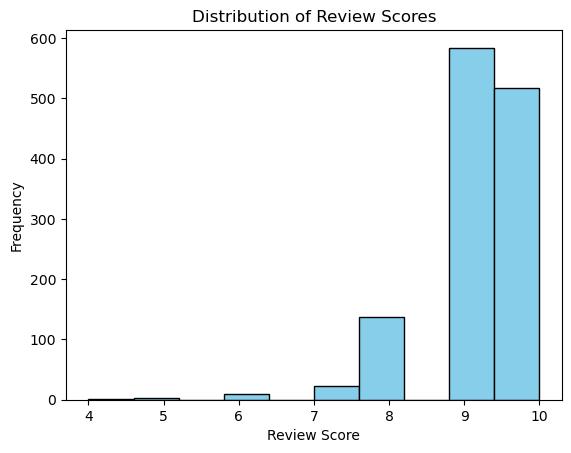

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 읽기
#df = pd.read_csv('final_plz/ak_reviews2_utf8.csv')

# 평점을 히스토그램으로 시각화
plt.hist(df1['review_score'], bins=10, color='skyblue', edgecolor='black')

# 그래프 제목과 라벨 설정
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Frequency')

# 그래프 출력
plt.show()

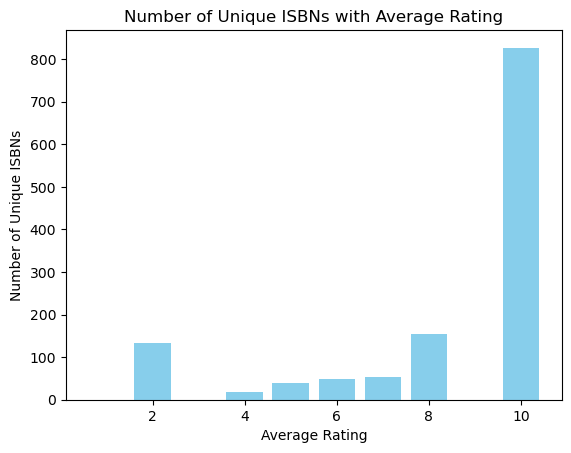

In [26]:
# <평점 별로 권수보기>
# 중복되는 ISBN을 모두 한개로 처리하기, 중복이 없다면 그냥 두기
# 각 ISBN당 review_score평균 구하기
# 가로축은 review_score 평균 1점부터 10 점까지
# 세로축은 ISBN의 갯수
# 해당 평균을 가진 중복되지 않는 ISBN이 몇개 있는지 막대그래프로 출력


import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 읽기
df = pd.read_csv('all_reviews_filtered_utf8.csv')

# 중복되는 ISBN을 한 개로 처리하기 (첫 번째 등장한 값을 유지)
df = df.drop_duplicates(subset='isbn')

# 각 ISBN당 review_score 평균 구하기
isbn_avg_ratings = df.groupby('isbn')['review_score'].mean()

# 평균이 없는 ISBN은 제거
isbn_avg_ratings.dropna(inplace=True)

# 가로축은 review_score 평균 1점부터 10점까지, 세로축은 ISBN의 갯수로 하는 막대 그래프 그리기
avg_ratings = range(1, 11)
num_isbn_with_avg_rating = []

for rating in avg_ratings:
    num_isbn = isbn_avg_ratings[isbn_avg_ratings == rating].count()
    num_isbn_with_avg_rating.append(num_isbn)

# 그래프 그리기
plt.bar(avg_ratings, num_isbn_with_avg_rating, color='skyblue')

# 그래프 제목과 축 레이블 설정
plt.title('Number of Unique ISBNs with Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Number of Unique ISBNs')

# 그래프 출력
plt.show()

In [27]:
num_isbn_with_avg_rating

[0, 134, 0, 17, 39, 48, 53, 154, 0, 827]

In [39]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv('all_reviews_filtered_utf8.csv', dtype={'isbn': str})

# 각 ISBN당 review_score 평균 구하기
isbn_avg_ratings = df.groupby('isbn')['review_score'].mean()

# 중복되는 ISBN을 한 개로 처리하기 (평균 계산 이후에 처리)
df = df.groupby('isbn').mean().reset_index()

# NaN 값이 있는 행 제거
isbn_avg_ratings.dropna(inplace=True)

# DataFrame으로 변환
isbn_avg_ratings = pd.DataFrame(isbn_avg_ratings)

# 중복된 isbn은 하나만 남겨두고 제거
isbn_avg_ratings.drop_duplicates(subset=['isbn'], keep='first', inplace=True)

# 결과 출력
isbn_avg_ratings = pd.DataFrame(isbn_avg_ratings)


TypeError: Could not convert 우리 아기 오감발달 시끌벅적 정글 사운드북우리 아기 오감발달 시끌벅적 정글 사운드북우리 아기 오감발달 시끌벅적 정글 사운드북우리 아기 오감발달 시끌벅적 정글 사운드북우리 아기 오감발달 시끌벅적 정글 사운드북우리 아기 오감발달 시끌벅적 정글 사운드북우리 아기 오감발달 시끌벅적 정글 사운드북우리 아기 오감발달 시끌벅적 정글 사운드북우리 아기 오감발달 시끌벅적 정글 사운드북우리 아기 오감발달 시끌벅적 정글 사운드북우리 아기 오감발달 시끌벅적 정글 사운드북 to numeric

In [40]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161872 entries, 0 to 161871
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   isbn               161423 non-null  object
 1   title              161872 non-null  object
 2   review_score       161872 non-null  int64 
 3   review_like_count  161872 non-null  int64 
 4   comment            161448 non-null  object
 5   review_id          161872 non-null  object
 6   reviewer           105305 non-null  object
dtypes: int64(2), object(5)
memory usage: 8.6+ MB
None


In [41]:
# review_score 열에 숫자가 아닌 값을 포함한 행 제거
df = df[pd.to_numeric(df['review_score'], errors='coerce').notnull()]

In [56]:
import pandas as pd
import random

# CSV 파일 읽기
df = pd.read_csv('all_reviews_filtered_utf8.csv')

# 긍정적인 평가와 부정적인 평가로 분리
positive_reviews = df[df['review_score'] > 5]
negative_reviews = df[df['review_score'] <= 5]

# 가장 긍정적인 평가를 받은 10개의 ISBN 선택
top_positive_isbn = positive_reviews.groupby('isbn')['review_score'].mean().nlargest(10).index

# 가장 부정적인 평가를 받은 10개의 ISBN 선택
top_negative_isbn = negative_reviews.groupby('isbn')['review_score'].mean().nsmallest(10).index

# 가장 긍정적인 평가를 받은 10개의 ISBN에서 각각 랜덤하게 하나의 리뷰 선택
selected_positive_reviews = pd.DataFrame()
for isbn in top_positive_isbn:
    isbn_reviews = positive_reviews[positive_reviews['isbn'] == isbn]
    # 랜덤하게 리뷰 선택
    random_review = isbn_reviews.sample(n=1)
    selected_positive_reviews = pd.concat([selected_positive_reviews, random_review])

# 가장 부정적인 평가를 받은 10개의 ISBN에서 각각 랜덤하게 하나의 리뷰 선택
selected_negative_reviews = pd.DataFrame()
for isbn in top_negative_isbn:
    isbn_reviews = negative_reviews[negative_reviews['isbn'] == isbn]
    # 랜덤하게 리뷰 선택
    random_review = isbn_reviews.sample(n=1)
    selected_negative_reviews = pd.concat([selected_negative_reviews, random_review])

In [57]:
# 결과 출력
print("Top 10 Positive Reviews:")
selected_positive_reviews[['isbn', 'title', 'review_score', 'comment']]

Top 10 Positive Reviews:


,isbn,title,review_score,comment
152486,9.788901e+12,태양 왕 수바: 수박의 전설,10,이지은 작가님의 팥빙수의 전설을 읽고 엄마인 제가 푹 빠져서 작가님 책 다 읽어봤어...
33577,9.788917e+12,ETS 토익기출 파트별 VOCA,10,배송도빠르고 책도좋습니다
146850,9.788926e+12,월급쟁이 부자로 은퇴하라 (10만 부 돌파 기념 증보판),10,부동산 투자에대한 심화 학습서야간 자율 학습은 선택
148387,9.788928e+12,틴틴팅클! 2,10,너무 사랑스럽고 귀여운 틴틴팅클 좋아요
148673,9.788935e+12,흔한남매 과학 탐험대 5 : 물리 1,10,재미있는 미로찾기 상식도 있고 아이가 너무 좋아합니다 데끼리 굿
145092,9.788935e+12,그 해 우리는 2,10,주문하실때 겉포장지 잘깨지니 던지지말라고 꼭 써서 배송하세요
65774,9.788936e+12,푸른 사자 와니니 4,10,분명 기쁨이 기다리고 있을 거야 친구를 찾아 용감하게 길을 나선 어린 코뿔소 파투의...
65855,9.788936e+12,푸른 사자 와니니 5,10,처음에는 단순한 사자 이야기 아니면 라이언 킹 같은 이야기인가 했었는데표지부터 시작...
83498,9.788936e+12,고양이 해결사 깜냥 3,10,고양이를 좋아하는 사람으로써 굉장히 내용이 기대되고 궁금하다
66668,9.788936e+12,고양이 해결사 깜냥 6,10,초등학생이라면 학년을 따지지 않고 모두 좋아하는 깜냥 엉뚱하긴 하지만 따뜻한 마음을...


In [58]:
print("\nTop 10 Negative Reviews:")
selected_negative_reviews[['isbn', 'title', 'review_score', 'comment']]


Top 10 Negative Reviews:


,isbn,title,review_score,comment
5824,9.788936e+12,소년이 온다,0,참옥한 역사.\n그 속의 사람들.\n읽는내내 먹먹함만...
64023,9.788983e+12,자기 앞의 생 (특별판),0,나는 철학자다 카츠 선생님의 뒤쪽 벽난로 위에는 새하얀 돛이 여럿 달린 돛배가 한 ...
62357,9.788956e+12,여덟 단어,0,결국 그는 미국 교육은 네 안에 있는 것은 무엇인가를 궁금해 한다면 한국 교육은 네...
151087,9.788925e+12,슬램덩크 그로부터 10일 후 (SLAM DUNK 10 DAYS AFTER),2,책 케이스가 박스종이재질이네여 완전조잡해여 유명한 슬램덩크작품을 이렇게 망치다니
138151,9.788988e+12,내 영혼이 따뜻했던 날들,2,작가의 본명은 아사 카터이며 그는 지도자 백인우월주의자 인종차별주의자였다 실제로 그...
42002,9.788957e+12,자본주의,0,"자본주의의 실체를 낱낱이 파헤친 책. \n왜 항상 물가가 오르고 빚은 늘어나는지, ..."
19493,9.788983e+12,연금술사,0,"p.23\n소녀와 함께 있는 시간이 영원히 끝나지 않기를 간절히 바라는 마음, 지금..."
156717,8.809478e+12,멜로디 봉봉 : 나들이 동요,2,어린 아가들이 하루종일 듣는 노래인데 노래가사말들이 죄다 별로에요 작은세상에서는 함...
65843,8.809478e+12,멜로디 봉봉 : 크리스마스 캐럴,2,주문 출고 배송 군더더기 없이 깔끔하게 받음 문제는 상품 자체 아직 호기심을 물고 ...
122103,9.788901e+12,"안녕, 친구야",2,정말강풀실망입니다 스토리가 너무 없네요 이건성의가없다고 해야할까요 다섯살 애가 보고...


In [ ]:
# 정해진 키워드를 통해 긍정적인 평가가 많은 10권, 부정적인 평가가 많은 10권

In [88]:
import pandas as pd
import random

# CSV 파일 읽기
df = pd.read_csv('all_reviews_filtered_utf8.csv')
df_info = pd.read_csv('info_merged_df.csv')
                 
# NaN 값이 있는 행 제거
df = df.dropna(subset=['comment'])

# 긍정적인 키워드 평가와 부정적인 키워드 평가로 분리
positive_keyword = '재미'  # 긍정적인 키워드
negative_keyword = '없'   # 부정적인 키워드

positive_reviews = df[df['comment'].str.contains(positive_keyword, case=False)]
negative_reviews = df[df['comment'].str.contains(negative_keyword, case=False)]


# 정해진 키워드를 통해 가장 긍정적인 평가를 받은 100개의 ISBN 선택
top_positive_isbn = positive_reviews.groupby('isbn').size().nlargest(100).index
# top_positive_isbn에서 'review_score' > 5인 가장 긍정적인 평가를 받은 10개의 ISBN 선택
positive_reviews = df[df['isbn'].isin(top_positive_isbn) & (df['review_score'] > 5)]
top_positive_isbn = positive_reviews.groupby('isbn')['review_score'].mean().nlargest(10).index


# 정해진 키워드를 통해 가장 부정적인 평가를 받은 100개의 ISBN 선택
top_negative_isbn = negative_reviews.groupby('isbn').size().nlargest(100).index
# top_negative_isbn에서 'review_score' <= 5인 가장 긍정적인 평가를 받은 10개의 ISBN 선택
negative_reviews = df[df['isbn'].isin(top_negative_isbn) & (df['review_score'] <= 5)]
top_negative_isbn = negative_reviews.groupby('isbn')['review_score'].mean().nsmallest(10).index


# 가장 긍정적인 평가를 받은 10개의 ISBN에서 각각 랜덤하게 하나의 리뷰 선택
selected_positive_reviews = pd.DataFrame()
for isbn in top_positive_isbn:
    isbn_reviews = positive_reviews[positive_reviews['isbn'] == isbn]
    # 랜덤하게 리뷰 선택
    random_review = isbn_reviews.sample(n=1)
    selected_positive_reviews = pd.concat([selected_positive_reviews, random_review])

    
# 가장 부정적인 평가를 받은 10개의 ISBN에서 각각 랜덤하게 하나의 리뷰 선택
selected_negative_reviews = pd.DataFrame()
for isbn in top_negative_isbn:
    isbn_reviews = negative_reviews[negative_reviews['isbn'] == isbn]
    # 랜덤하게 리뷰 선택
    random_review = isbn_reviews.sample(n=1)
    selected_negative_reviews = pd.concat([selected_negative_reviews, random_review])
    


In [89]:
# 결과 출력
print("Top 10 Positive Reviews:")
selected_positive_reviews[['isbn', 'title', 'review_score', 'comment']]

Top 10 Positive Reviews:


,isbn,title,review_score,comment
66292,9.791168e+12,흔한남매 13,10,아이가 너무 좋아하는 초등만화추천 책인 흔한남매시리즈의 신권 권이 나와서 만나보았는...
64928,9.791168e+12,흔한남매 11,10,초등코믹만화 흔한남매 헤어날 수 없네 흔한남매 흔한남매시리즈 남매만화 남매이야기 유...
66447,9.791168e+12,흔한남매 14,10,흔한남매 시리즈 숨은그림찾기 초등만화 흔한남매 초등만화 베스트셀러 으뜸이 에이미 코...
65130,9.791165e+12,설민석의 한국사 대모험 20,10,빈양이 좋아하는 설민석 쌤의 한국사 대모험 권이 나왔어요 년 권이 출간한 이후 누적...
22665,9.791164e+12,흔한남매 7,10,내용이 재밌어서 잘 읽혀요
19057,9.788949e+12,양순이네 떡집,10,좋았어요ㅎ 또 좋은책 구입할께요
28352,9.788957e+12,시간 고양이,10,책이 재미있어 아이들이 구매를 요청했습니다.
29054,9.791168e+12,오백 년째 열다섯,10,유익해요 추천합니다.
8682,9.788949e+12,장군이네 떡집,10,아이들이 쉽고 재미있게 읽기좋은책같아요~~
82261,9.791165e+12,설민석의 한국사 대모험 16,10,아이들이 너무 좋아해서 매 편 사주고 있어요


In [90]:
print("\nTop 10 Negative Reviews:")
selected_negative_reviews[['isbn', 'title', 'review_score', 'comment']]


Top 10 Negative Reviews:


,isbn,title,review_score,comment
63999,9.788983e+12,자기 앞의 생 (특별판),0,그런 감정은 내 속에서 치밀어오른 것이었고 그래서 더욱 위험했다 발길로 엉덩이를 차...
138151,9.788988e+12,내 영혼이 따뜻했던 날들,2,작가의 본명은 아사 카터이며 그는 지도자 백인우월주의자 인종차별주의자였다 실제로 그...
106954,9.788936e+12,금요일엔 돌아오렴,2,돌아 오렴
113582,9.788936e+12,송곳 1~6 세트 - 전6권,2,미리 사놓은 권 세트 환불을 해주던지 권 조건도 맞춰줘야 할텐데
78067,9.788937e+12,동물농장,4,재미있긴 한데 기대를 너무 많이 했나보다
114763,9.788955e+12,전쟁은 여자의 얼굴을 하지 않았다,2,왜 노벨문학상인지 확인하게 되는 책
146248,9.788955e+12,밝은 밤,2,쇼코의 미소를 읽고 바로 구매를 결정했다 그리고 이 작가에게 정말 실망했다 이야기의...
125001,9.788972e+12,나의 한국현대사,2,보수정권은 악 진보정권은 선노무현 김대중은 성장과 분배를 모두 달성한 대통령그냥 실...
147377,9.791191e+12,"어느 날, 내 죽음에 네가 들어왔다",2,뭐랄까 작가에겐 미안하지만 항마력이딸려서 책을 덮었다 아무리 인터넷 소설이라지만 개...
65707,9.791192e+12,오은영 박사가 전하는 금쪽이들의 진짜 마음속,2,금쪽이 아니죠 문제아 맞습니다학부모가 교사 찾아가서 진상짓하고 교장교감 찾아가게 부...


In [ ]:
# 작가 정보 추가

In [1]:
import pandas as pd

# CSV 파일을 읽어와 데이터프레임으로 변환
df_info = pd.read_csv("merged_df.csv", encoding = 'utf-8')
print(df_info.shape)

# ISBN을 기준으로 중복된 행 중 첫 번째 행만 남기고 나머지는 삭제
df_info.drop_duplicates(subset=['isbn'], keep='first', inplace=True)
print(df_info.shape)


(1613, 14)
(1076, 14)


In [144]:
df_info.shape

(1076, 14)

In [171]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv('all_reviews_filtered_utf8.csv')
#df_info = pd.read_csv('info_merged_df.csv')

# NaN 값이 있는 행 제거
df = df.dropna(subset=['comment'])

positive_keyword = input("원하는 리뷰 키워드를 입력하고 엔터를 눌러주세요: ")
negative_keyword = input("원하는 리뷰 키워드를 입력하고 엔터를 눌러주세요: ")
# # 긍정적인 키워드 평가와 부정적인 키워드 평가로 분리
# positive_keyword = '재미'  # 긍정적인 키워드
# negative_keyword = '없'   # 부정적인 키워드

positive_reviews = df[df['comment'].str.contains(positive_keyword, case=False)]
negative_reviews = df[df['comment'].str.contains(negative_keyword, case=False)]

# 정해진 키워드를 통해 가장 긍정적인 평가를 받은 100개의 ISBN 선택
top_positive_isbn = positive_reviews.groupby('isbn').size().nlargest(100).index
# top_positive_isbn에서 'review_score' > 5인 가장 긍정적인 평가를 받은 10개의 ISBN 선택
positive_reviews = df[df['isbn'].isin(top_positive_isbn) & (df['review_score'] > 5)]
top_positive_isbn = positive_reviews.groupby('isbn')['review_score'].mean().nlargest(10).index

# 정해진 키워드를 통해 가장 부정적인 평가를 받은 100개의 ISBN 선택
top_negative_isbn = negative_reviews.groupby('isbn').size().nlargest(100).index
# top_negative_isbn에서 'review_score' <= 5인 가장 부정적인 평가를 받은 10개의 ISBN 선택
negative_reviews = df[df['isbn'].isin(top_negative_isbn) & (df['review_score'] <= 5)]
top_negative_isbn = negative_reviews.groupby('isbn')['review_score'].mean().nsmallest(10).index

# 중복된 리뷰를 선택하지 않고 하나의 ISBN당 하나의 리뷰만 선택
selected_positive_reviews = pd.DataFrame()
selected_negative_reviews = pd.DataFrame()

# 가장 긍정적인 평가를 받은 10개의 ISBN에서 각각 하나의 리뷰 선택
for isbn in top_positive_isbn:
    isbn_reviews = positive_reviews[positive_reviews['isbn'] == isbn]
    if not isbn_reviews.empty:
        random_review = isbn_reviews.sample(n=1)
        selected_positive_reviews = pd.concat([selected_positive_reviews, random_review])

# 작가 정보 추가
selected_positive_reviews = pd.merge(selected_positive_reviews, df_info[['isbn', 'author']], on='isbn', how='left')

# 가장 부정적인 평가를 받은 10개의 ISBN에서 각각 하나의 리뷰 선택
for isbn in top_negative_isbn:
    isbn_reviews = negative_reviews[negative_reviews['isbn'] == isbn]
    if not isbn_reviews.empty:
        random_review = isbn_reviews.sample(n=1)
        selected_negative_reviews = pd.concat([selected_negative_reviews, random_review])

# 작가 정보 추가
selected_negative_reviews = pd.merge(selected_negative_reviews, df_info[['isbn', 'author']], on='isbn', how='left')

원하는 리뷰 키워드를 입력하고 엔터를 눌러주세요:  재미
원하는 리뷰 키워드를 입력하고 엔터를 눌러주세요:  실망


In [172]:
# 결과 출력
print("Top 10 Positive Reviews:")
selected_positive_reviews[['isbn', 'title', 'author', 'review_score', 'comment']]

Top 10 Positive Reviews:


,isbn,title,author,review_score,comment
0,9.791168e+12,흔한남매 13,"흔한남매 (지은이), 백난도 (글), 유난희 (그림), 흔한컴퍼니 (감수)",10,딸아이가 기다렸을정도로 너무 기대하고 있었는데역시나 너무 좋아하더라구요 재미있어서 ...
1,9.791168e+12,흔한남매 11,"흔한남매 (지은이), 백난도 (글), 유난희 (그림), 흔한컴퍼니 (감수)",10,흔한남매의 콘텐츠는 늘 웃음과 행복을 주는 거 같아요 아이에게 힐링을 주는 책
2,9.791168e+12,흔한남매 14,"흔한남매 (지은이), 백난도 (글), 유난희 (그림), 흔한컴퍼니 (감수)",10,안녕하세요 흔한남매 시리즈 권 출간으로 돌아왔어요긴 추석 연휴를 즐겁고 알차게 보낼...
3,9.791165e+12,설민석의 한국사 대모험 20,"설민석, 스토리박스 (지은이), 정현희 (그림), 강석화 (감수)",10,근현대쪽도 나왔으면 좋겠어요
4,9.791164e+12,흔한남매 7,"흔한남매 (지은이), 백난도 (글), 유난희 (그림), 흔한컴퍼니 (감수)",10,너무 너무 웃겨요 ㅎㅎ
5,9.788949e+12,양순이네 떡집,"김리리 (지은이), 김이랑 (그림)",10,내용이 좋고 아이도 잘 읽어요
6,9.788957e+12,시간 고양이,박미연,10,아이의 푹 빠져서 읽었어요
7,9.791168e+12,오백 년째 열다섯,김혜정,10,재미있게 잘 읽었어요
8,9.788949e+12,장군이네 떡집,"김리리 (지은이), 이승현 (그림)",10,잘읽힙니다 &#4514;시리즈로 구매하였네요
9,9.791165e+12,설민석의 한국사 대모험 16,"설민석, 스토리박스 (지은이), 정현희 (그림), 태건 역사 연구소 (감수)",10,초부터 꾸준히 구입해서 읽고있습니다 역사책 좋아하지 않는 아이인데 설민석선생님 책은...


In [173]:
print("\nTop 10 Negative Reviews:")
selected_negative_reviews[['isbn', 'title', 'author', 'review_score', 'comment']]


Top 10 Negative Reviews:


,isbn,title,author,review_score,comment
0,9.788955e+12,밝은 밤,최은영 (지은이),2,표지가 큰 일을 하였다 읽다가 지겨워 책을 덮을 때마다 기분이 좋아지는 이 표지를 ...
1,9.788972e+12,나의 한국현대사,NaN,2,책을 쓸땐 다양한 각도와 통찰력으로 쓰시길
2,9.788936e+12,조국의 시간,조국 (지은이),2,시간남는분들만 보세요
3,9.788951e+12,반지의 제왕 1~3 + 호빗 세트 - 전4권,"존 로날드 로웰 톨킨 (지은이), 김보원, 김번, 이미애 (옮긴이)",2,반품교환신청했어요 읽기도 전에 기운빠집니다 예약도서라 이런 일은 생각도 못했네요
4,9.791133e+12,원펀맨 One Punch Man 1,NaN,2,모세의 기적처럼 인쇄가 바다처럼 갈라졌다 인쇄는 열린 문
5,9.788973e+12,나미야 잡화점의 기적 (양장),"히가시노 게이고 (지은이), 양윤옥 (옮긴이)",4,아무리 읽어도 적응이 안되는 작가 특유의 작위적 설정
6,9.788901e+12,역행자,자청 (지은이),2,자청은 성공을 판매해서 또 성공하겠지 세상이 그걸 원하니까 책 읽고 글쓰란 말 빼놓...
7,9.791191e+12,미래의 부,이지성 (지은이),2,책을써서 부를 이룬 사람에게 부를 배울 순 없딘
8,9.788955e+12,2021 제12회 젊은작가상 수상작품집,"전하영, 김멜라, 김지연, 김혜진, 박서련, 서이제, 한정현 (지은이)",4,작품 본연에 관한 설명은 없고 남혐여혐이러네요 개인적으로 일부는 페미니즘에 점령당한...
9,9.791188e+12,에이트,이지성 (지은이),2,고착화된 극우 보수적인 사고를 지닌 지은이가 무슨 대안을 제시할 수 있을까


In [ ]:
# 한글 기준

# 사용하는 데이터 프레임 df, df_info

# df에서 review_score가 10인 긍정 comment에서 긍정적인 단어를 뽑음 -> 긍정 단어 리스트로 정의 -> 데이터프레임 전환
# df에서 review_score가 <5인 부정 comment에서 부정적인 단어를 뽑음 -> 부정 단어 리스트로 정의 -> 데이터 프레임 전환
# 두 리스트에서 겹치는 단어 제외시키고 겹치는 단어 리스트를따로 만든다.

# 겹치는 단어 입력시에는 해당 단어가 comment에 포함되었을때 review_score <5인 부정적인 리뷰가 많은지 review_score 10점인 긍정적 리뷰가 많은지 판단한다.
# review_score <5인 부정적인 리뷰가 많은 경우 부정 단어로 처리한다
# review_score가 10점인 긍정적 리뷰가 많은 경우 긍정 단어로 처리한다.

# 긍정 단어로 처리되었을 경우 
# df에서 해당 단어가 포함된 comment가  review_score>7인 행 중 랜덤으로 5개를 뽑아 isbn을 추출한다.
# 뽑은 5개의 isbn을 df_info에서 찾아 행을 출력한다.

# 부정 단어로 처리되었을 경우 
# df에서 해당 단어가 포함된 comment가  review_score<5인 행 중 랜덤으로 3개를 뽑아 isbn을 추출한다.
# 뽑은 3개의 isbn을 df_info에서 찾아 행을 출력한다.
# 그리고 df에서 해당 단어가 포함된 comment를 가진 isbn 중 review_score>7인 책 2권을 추천한다.

In [156]:
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()
sys_font[12]

'C:\\Windows\\Fonts\\MapoFlowerIsland.ttf'

In [158]:
!pip install konlpy

   ---------------------------------------- 0.0/19.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.4 MB 640.0 kB/s eta 0:00:31
   ---------------------------------------- 0.2/19.4 MB 2.3 MB/s eta 0:00:09
   - -------------------------------------- 0.6/19.4 MB 5.1 MB/s eta 0:00:04
   - -------------------------------------- 0.9/19.4 MB 5.8 MB/s eta 0:00:04
   -- ------------------------------------- 1.4/19.4 MB 6.3 MB/s eta 0:00:03
   --- ------------------------------------ 1.7/19.4 MB 6.9 MB/s eta 0:00:03
   ---- ----------------------------------- 2.1/19.4 MB 7.0 MB/s eta 0:00:03
   ----- ---------------------------------- 2.6/19.4 MB 7.6 MB/s eta 0:00:03
   ----- ---------------------------------- 2.9/19.4 MB 7.3 MB/s eta 0:00:03
   ------ --------------------------------- 3.2/19.4 MB 7.3 MB/s eta 0:00:03
   ------- -------------------------------- 3.8/19.4 MB 7.9 MB/s eta 0:00:02
   -------- ------------------------------- 4.2/19.4 MB 7.9 MB/s eta 0:00:02
   -

In [159]:
!pip install nltk

In [153]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# df_info
# CSV 파일을 읽어와 데이터프레임으로 변환
df_info = pd.read_csv("merged_df.csv")
# ISBN을 기준으로 중복된 행 중 첫 번째 행만 남기고 나머지는 삭제
df_info.drop_duplicates(subset=['isbn'], keep='first', inplace=True)

# df
# CSV 파일 읽기
df = pd.read_csv('all_reviews_filtered_utf8.csv')
# NaN 값이 있는 행 제거
df = df.dropna(subset=['comment'])

In [157]:
from wordcloud.wordcloud import FONT_PATH
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

In [161]:
import re

# 한글 단어를 추출하는 함수
def extract_korean_words(comment):
    """
    주어진 코멘트에서 한글 단어를 추출하여 리스트로 반환합니다.
    """
    # 한글 단어 패턴 정의
    pattern = re.compile('[가-힣]+')
    # 정규식을 이용하여 한글 단어 추출
    korean_words = pattern.findall(comment)
    return korean_words

# 긍정적인 단어 추출
positive_words = []
for comment in df[df['review_score'] >= 10]['comment']:
    korean_words = extract_korean_words(comment)
    positive_words.extend(korean_words)

# 부정적인 단어 추출
negative_words = []
for comment in df[df['review_score'] < 5]['comment']:
    korean_words = extract_korean_words(comment)
    negative_words.extend(korean_words)

# 두 리스트에서 겹치는 단어 제외
common_words = set(positive_words) & set(negative_words)
positive_words = [word for word in positive_words if word not in common_words]
negative_words = [word for word in negative_words if word not in common_words]

print("긍정적인 단어:", positive_words)
print("부정적인 단어:", negative_words)
print("겹치는 단어:", common_words)


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [164]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.font_manager as fm

In [165]:
# 한글 폰트 설정
all_fonts = fm.findSystemFonts(fontpaths=None, fontext="ttf")

# "Nanum"으로 시작하는 폰트 찾기
nanum_fonts = [font for font in all_fonts if "Nanum" in font]

# 폰트 설정
if len(nanum_fonts) > 0:
    font_name = fm.FontProperties(fname=nanum_fonts[1]).get_name()
    plt.rcParams["font.family"] = font_name
else:
    print("Nanum으로 시작하는 폰트가 설치되지 않았습니다.")

In [168]:
# 키워드 입력 받기
keywords_input = input("원하는 리뷰 키워드를 입력하고 엔터를 눌러주세요(여러개 입력 시 ',' 으로 구분해주세요): ")
keywords = keywords_input.split(',')

#리뷰 데이터 로드
data = pd.read_csv('all_reviews_filtered_utf8.csv')
# sklearn의 TF-IDF 벡터라이저와 코사인 유사도를 활용하여 키워드와 리뷰 간의 유사성을 계산합니다.
# 각 리뷰와 키워드의 TF-IDF 벡터를 계산하여 코사인 유사도를 계산합니다.

# NaN 값을 빈 문자열로 대체
data['comment'] = data['comment'].fillna("")

# 단어들을 하나의 문자열로 합침
keywords_string = " ".join(keywords)

# 데이터프레임에 새로운 행 추가, 모든 컬럼에 대해 값을 설정
data.loc[len(data)] = [None, None, None, None, keywords_string, None, None]

원하는 리뷰 키워드를 입력하고 엔터를 눌러주세요(여러개 입력 시 ',' 으로 구분해주세요):  재미


In [169]:
# 상위 3권의 책 제목을 추출
top_3_books_titles = sorted_books_by_similarity.index[:3]

# 각 책별로 유사도 점수가 높은 상위 10개의 리뷰를 선택
top_reviews_per_book_expanded = data.sort_values(by='similarity_score', ascending=False).groupby('title').head(10)

# 상위 3권의 책에 대한 유사한 리뷰를 선택
top_reviews_for_top_books_expanded = top_reviews_per_book_expanded[top_reviews_per_book_expanded['title'].isin(top_3_books_titles)]

# 결과 출력을 위해 책 제목별로 리뷰를 그룹화
grouped_reviews_expanded = top_reviews_for_top_books_expanded.groupby('title')['comment'].apply(list)

# 각 리뷰 코멘트를 쉼표(,) 기준으로 한 줄씩 출력하되, 각 타이틀당 최대 10개의 리뷰만 출력
for title, comments in grouped_reviews_expanded.items():
    print(f'{title}\n{"-" * len(title)}')
    
    # 쉼표로 구분된 리뷰를 분리하고, 최대 5개까지만 가져옵니다.
    comments_list = comments[:5]
    
    # 각 리뷰 앞에 순서 번호를 붙여서 출력합니다.
    for idx, comment in enumerate(comments_list, 1):
        print(f'{idx}. {comment}')
    
    print("\n")  # 제목별로 구분을 위해 추가된 빈 줄

NameError: name 'sorted_books_by_similarity' is not defined

In [ ]:
# 유사도 점수의 75번째 백분위수를 기준으로 설정 (유사도가 높은 리뷰를 식별하기 위한 기준)
threshold = np.percentile(data['similarity_score'], 75)

# 유사도가 높은 리뷰들만 필터링
high_similarity_reviews = data[data['similarity_score'] > threshold]

# 각 책별로 유사도가 높은 리뷰의 개수 계산
high_similarity_counts = high_similarity_reviews.groupby('title').size()

# 각 책별 전체 리뷰 개수 계산 (마지막에 추가된 키워드 행은 제외)
total_review_counts = data.iloc[:-1].groupby('title').size()

# 유사도가 높은 리뷰의 비율 계산
similarity_ratio = high_similarity_counts / total_review_counts

# Top 3 책 필터링
top_3_books = sorted_books_by_similarity.index[:3]

# Top 3 책의 유사도 비율 선택
top_3_similarity_ratio = similarity_ratio[top_3_books]

In [174]:
#### 참고해서 변형해보기

In [180]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv('all_reviews_filtered_utf8.csv')

# NaN 값이 있는 행 제거
df = df.dropna(subset=['comment'])

positive_keyword = input("원하는 긍정적인 키워드를 입력하고 엔터를 눌러주세요: ")
negative_keyword = input("원하는 부정적인 키워드를 입력하고 엔터를 눌러주세요: ")

positive_reviews = df[df['comment'].str.contains(positive_keyword, case=False)]
negative_reviews = df[df['comment'].str.contains(negative_keyword, case=False)]

# 입력받은 키워드가 포함된 가장 긍정적인 평가를 받은 100개의 ISBN 선택
top_positive_isbn = positive_reviews.groupby('isbn')['review_score'].mean().nlargest(100).index
# top_positive_isbn에서 'review_score' > 5인 가장 긍정적인 평가를 받은 10개의 ISBN 선택
positive_reviews = df[df['isbn'].isin(top_positive_isbn) & (df['review_score'] > 5)]
top_positive_isbn = positive_reviews.groupby('isbn')['review_score'].mean().nlargest(10).index

# 입력받은 키워드가 포함된 가장 부정적인 평가를 받은 100개의 ISBN 선택
top_negative_isbn = negative_reviews.groupby('isbn')['review_score'].mean().nsmallest(100).index
# top_negative_isbn에서 'review_score' <= 5인 가장 부정적인 평가를 받은 10개의 ISBN 선택
negative_reviews = df[df['isbn'].isin(top_negative_isbn) & (df['review_score'] <= 5)]
top_negative_isbn = negative_reviews.groupby('isbn')['review_score'].mean().nsmallest(10).index

# 중복된 리뷰를 선택하지 않고 하나의 ISBN당 하나의 리뷰만 선택
selected_positive_reviews = pd.DataFrame()
selected_negative_reviews = pd.DataFrame()

# 가장 긍정적인 평가를 받은 10개의 ISBN에서 각각 하나의 리뷰 선택
for isbn in top_positive_isbn:
    isbn_reviews = positive_reviews[positive_reviews['isbn'] == isbn]
    if not isbn_reviews.empty:
        random_review = isbn_reviews.sample(n=1)
        selected_positive_reviews = pd.concat([selected_positive_reviews, random_review])

# 가장 부정적인 평가를 받은 10개의 ISBN에서 각각 하나의 리뷰 선택
for isbn in top_negative_isbn:
    isbn_reviews = negative_reviews[negative_reviews['isbn'] == isbn]
    if not isbn_reviews.empty:
        random_review = isbn_reviews.sample(n=1)
        selected_negative_reviews = pd.concat([selected_negative_reviews, random_review])

# 결과 출력
print("가장 긍정적인 평가를 받은 책:")
print(selected_positive_reviews)

print("\n가장 부정적인 평가를 받은 책:")
print(selected_negative_reviews)

원하는 긍정적인 키워드를 입력하고 엔터를 눌러주세요:  재미
원하는 부정적인 키워드를 입력하고 엔터를 눌러주세요:  실망


가장 긍정적인 평가를 받은 책:
                isbn                 title  review_score  review_like_count  \
152504  9.788901e+12       태양 왕 수바: 수박의 전설            10                  0   
148674  9.788935e+12  흔한남매 과학 탐험대 5 : 물리 1            10                  0   
65774   9.788936e+12           푸른 사자 와니니 4            10                  1   
65855   9.788936e+12           푸른 사자 와니니 5            10                  0   
83507   9.788936e+12          고양이 해결사 깜냥 3            10                  1   
152509  9.788936e+12          고양이 해결사 깜냥 6            10                  1   
147971  9.788949e+12              랑랑 형제 떡집            10                  0   
153478  9.788949e+12              하하 자매 떡집            10                  2   
159932  9.788955e+12       룬의 아이들 - 블러디드 2            10                  2   
80157   9.788936e+12                조국의 시간            10                  2   

                                                  comment   review_id  \
152504  애니메이션 영화 한 편 본 것 같아요 숨을 못쉬고 읽은 

In [176]:
# 결과 출력
print("Top 10 Positive Reviews:")
selected_positive_reviews[['isbn', 'title', 'author', 'review_score', 'comment']]

Top 10 Positive Reviews:


,isbn,title,author,review_score,comment
0,9.791168e+12,흔한남매 13,"흔한남매 (지은이), 백난도 (글), 유난희 (그림), 흔한컴퍼니 (감수)",10,초 아이의 최애책 권 발간을 환영합니다 우리 아이는 식탁에서 간식 먹으며 흔한남매 ...
1,9.791190e+12,제 인생에 답이 없어요,선바 (지은이),10,사랑한다
2,9.788965e+12,한 권으로 끝내는 해커스 토익 700+(LC+RC+VOCA),해커스어학연구소 (지은이),10,보카 열심히 외워보고 있습니다.
3,9.791198e+12,설민석의 한국사 대모험 24,"설민석, 스토리박스 (지은이), 정현희 (그림), 강석화 (감수)",10,항상 기다리게 되는 설민석 쌤과의 한국사 대모험 대망의 권
4,9.791192e+12,오은영 박사가 전하는 금쪽이들의 진짜 마음속,오은영 (지은이),10,오은영 박사가 나오는 프로그램을 봐서 그런지 책을 읽는 느낌이 아니라 그녀의 말을 ...
5,9.788936e+12,금요일엔 돌아오렴,NaN,10,세월호를 겪으며 우리시대가 절대로 안전지대가 아닌것을 실감하며아이들을 놓쳐버린 부모...
6,9.788936e+12,송곳 1~6 세트 - 전6권,NaN,10,드라마 보고 책 샀습니다 역시 최규석이라는 생각이 들게 하는 책입니다
7,9.788961e+12,10배의 법칙,"그랜트 카돈 (지은이), 최은아 (옮긴이)",10,도움되는 내용이 많습니다
8,9.788959e+12,그래도 괜찮은 하루 (윈터에디션),NaN,10,베니를 그리게 된 작가의 이유가 참 감동이었어요 저도 이렇게 희망을 갖고 살고 싶네요
9,9.788955e+12,긴긴밤,루리 (지은이),10,아이랑 잠들기전에 한 챕터씩 읽고 자요살인 저에게조 아이에게도 긴긴밤이 지나고 푸른...


In [177]:
print("\nTop 10 Negative Reviews:")
selected_negative_reviews[['isbn', 'title', 'author', 'review_score', 'comment']]


Top 10 Negative Reviews:


,isbn,title,author,review_score,comment
0,9.788955e+12,밝은 밤,최은영 (지은이),2,표지가 큰 일을 하였다 읽다가 지겨워 책을 덮을 때마다 기분이 좋아지는 이 표지를 ...
1,9.788972e+12,나의 한국현대사,NaN,2,책을 쓸땐 다양한 각도와 통찰력으로 쓰시길
2,9.788936e+12,조국의 시간,조국 (지은이),2,당신의 책을 권이나 샀고 당신에게 도움이되고 싶었습니다그러나 지금 당신은 이책에서 ...
3,9.788951e+12,반지의 제왕 1~3 + 호빗 세트 - 전4권,"존 로날드 로웰 톨킨 (지은이), 김보원, 김번, 이미애 (옮긴이)",2,교환 공지 왜 안돌리세요이렇게 하자가 많은데 직접 찾아봐야 알게하다니 장난하나 고발...
4,9.791133e+12,원펀맨 One Punch Man 1,NaN,2,최악
5,9.788973e+12,나미야 잡화점의 기적,"히가시노 게이고 (지은이), 양윤옥 (옮긴이)",0,가슴 따뜻한 이야기.
6,9.788901e+12,역행자,자청 (지은이),2,참을 수 없는 가벼움
7,9.791191e+12,미래의 부,이지성 (지은이),2,기대가 안됩니다
8,9.788955e+12,2021 제12회 젊은작가상 수상작품집,"전하영, 김멜라, 김지연, 김혜진, 박서련, 서이제, 한정현 (지은이)",2,소수자의 의견을 대변한다는 궤변에 갇혀 본질을 잃어버린 년의 젊은 문학그들이 소수자...
9,9.791188e+12,에이트,이지성 (지은이),2,왜 이런게


In [204]:
import pandas as pd
import re

# CSV 파일 읽기
df = pd.read_csv('all_reviews_filtered_utf8.csv')

# NaN 값이 있는 행 제거
df = df.dropna(subset=['comment'])

# review_score가 10인 행만 선택
# review_score가 10인 행만 선택하여 500개로 제한
df = df[df['review_score'] == 10].head(500)

# comment 열에서 한글 단어 추출
korean_words = df['comment'].apply(lambda x: re.findall(r'[가-힣]+', str(x)))

# 정규표현식을 사용하여 한글 단어 추출
# 한글 단어 패턴: [ㄱ-ㅎㅏ-ㅣ가-힣]+
# '+'는 한글 단어가 최소 1개 이상 나오는 것을 의미
#korean_words = df['comment'].str.findall(r'[ㄱ-ㅎㅏ-ㅣ가-힣]+')

# 추출된 한글 단어를 하나의 리스트로 통합
korean_words_list = [word for sublist in korean_words for word in sublist]

# 중복 제거를 위해 set으로 변환 후 다시 리스트로 변환
korean_words_unique = list(set(korean_words_list))

# 결과 출력
#print("추출된 한글 단어:")
#print(korean_words_unique)

In [212]:
unique_words = []
for words in korean_words:
    for word in words:
        is_duplicate = False
        for unique_word in unique_words:
            if len(word) >= 2 and len(unique_word) >= 2 and word in unique_word:
                is_duplicate = True
                break
        if not is_duplicate:
            unique_words.append(word)

# 중복 제거된 한글 단어 출력
print(unique_words)

['나', '자신이', '행복한', '법에', '대해', '고민해', '볼', '수', '있는', '책이었습니다', '책을', '읽고', '행복해지는', '방법에', '대해서', '알', '수', '있었어요', '고민하고', '계시다면', '나를', '위한', '처방전으로', '좋을', '것', '같습니다', '글귀가', '마음에', '와', '닿아요', '나름', '젊은이가', '쓴', '조숙한', '이야기', '가볍게', '읽다', '울뻔', '울었다', '배송받고', '하루만에', '다읽었어요', '매우공감되고', '와닿는말이', '많았어요', '읽고나니', '위로가되는책이였숩니다', '잘읽혀서', '한번에읽었어요', '두고두고', '복잡할때', '읽을까해요', '귀엽게', '생겼네요', '내용도', '쉽고', '잘', '읽혀요', '공감되는', '부분이', '많습니다', '한번씩', '피식', '웃게만드는책', '쉽게', '잘', '읽히고', '많은', '생각을', '하게되네요', '정말', '생각하게', '되네용', '마음이', '따뜻해져요', '너무', '좋아요', '힐링되는', '책이었어요', '감성에세이를', '좋아하는', '편이', '아닌데', '이책은', '편안해지고', '나', '자신에대해서', '좀더', '생각해볼수', '기회를', '줘서', '좋습니다', '읽기', '좋으니', '여행가서', '읽는것도', '좋겠네요', '내가', '작가가된', '느낌으로', '읽힙니다', '친구랑', '대화하는', '기분이고', '읽다보면', '시간가는줄', '모릅니다', '책사이즈가', '귀여워서', '휴대하면서', '아직', '완독하지', '않았지만', '읽으면서', '힐링하려고요', '사놓고', '언제', '읽지', '하다가', '심심해서', '폈다가', '책', '편자리에서', '다읽어버렸어요', '빨리', '읽어버려서', '아쉬울정도로', '중간중간', '제가', '쓸수있는', '부분들도', '참신하고', '좋더라구요', '뭔가', '묘', '

In [ ]:
main_string = "이것은 샘플 문자열입니다."
search_string = "샘플"

if main_string.find(search_string) != -1:
    print("검색 문자열이 메인 문자열에 포함되어 있습니다.")
else:
    print("검색 문자열이 메인 문자열에 포함되어 있지 않습니다.")


In [216]:
import pandas as pd
import re

# CSV 파일 읽기
df = pd.read_csv('all_reviews_filtered_utf8.csv')

# review_score가 10인 행만 선택하여 500개로 제한
df = df[df['review_score'] == 10].head(500)

# comment 열에서 한글 단어 추출
korean_words = df['comment'].apply(lambda x: re.findall(r'[가-힣]+', str(x)))

# 중복 제거 및 조건에 맞는 단어 추출
unique_words = set()
for words in korean_words:
    for word in words:
        if len(word) >= 1:  # 1글자 이상인 단어에 대해서만 처리
            # 단어에서 1글자 이상 겹치고 3번 이상 반복하는 부분 패턴 검사
            pattern = rf'({word})\1{{2,}}'
            if re.search(pattern, word):
                unique_words.add(word)

# 사용자로부터 키워드 입력 받기
keyword = input("원하는 키워드를 입력하고 엔터를 눌러주세요: ")

# 입력된 키워드가 unique_words에 있는지 확인하여 긍정 키워드인지 부정 키워드인지 판단
is_positive = any(keyword in word for word in unique_words)

# 결과 출력
if is_positive:
    print(f"'{keyword}'는 긍정 키워드입니다.")
    positive_reviews = df[df['comment'].str.contains(keyword, case=False)]
    # 입력받은 키워드가 포함된 가장 긍정적인 평가를 받은 100개의 ISBN 선택
    top_positive_isbn = positive_reviews.groupby('isbn')['review_score'].mean().nlargest(100).index
    # top_positive_isbn에서 'review_score' > 5인 가장 긍정적인 평가를 받은 10개의 ISBN 선택
    positive_reviews = df[df['isbn'].isin(top_positive_isbn) & (df['review_score'] > 5)]
    top_positive_isbn = positive_reviews.groupby('isbn')['review_score'].mean().nlargest(10).index
    
    # 중복된 리뷰를 선택하지 않고 하나의 ISBN당 하나의 리뷰만 선택
    selected_positive_reviews = pd.DataFrame()
    
    # 가장 긍정적인 평가를 받은 10개의 ISBN에서 각각 하나의 리뷰 선택
    for isbn in top_positive_isbn:
        isbn_reviews = positive_reviews[positive_reviews['isbn'] == isbn]
        if not isbn_reviews.empty:
            random_review = isbn_reviews.sample(n=1)
            selected_positive_reviews = pd.concat([selected_positive_reviews, random_review])
            
    # 결과 출력
    print("가장 긍정적인 평가를 받은 책:")
    if not selected_positive_reviews.empty:
        print(selected_positive_reviews[['isbn', 'title', 'author', 'review_score', 'comment']])
    else:
        print("해당하는 책이 없습니다.")

else:
    print(f"'{keyword}'는 부정 키워드입니다.")
    negative_reviews = df[df['comment'].str.contains(keyword, case=False)]
    
    # 입력받은 키워드가 포함된 가장 부정적인 평가를 받은 100개의 ISBN 선택
    top_negative_isbn = negative_reviews.groupby('isbn')['review_score'].mean().nsmallest(100).index
    # top_negative_isbn에서 'review_score' <= 5인 가장 부정적인 평가를 받은 10개의 ISBN 선택
    negative_reviews = df[df['isbn'].isin(top_negative_isbn) & (df['review_score'] <= 5)]
    top_negative_isbn = negative_reviews.groupby('isbn')['review_score'].mean().nsmallest(10).index
    
    # 중복된 리뷰를 선택하지 않고 하나의 ISBN당 하나의 리뷰만 선택
    selected_negative_reviews = pd.DataFrame()
    # 가장 부정적인 평가를 받은 10개의 ISBN에서 각각 하나의 리뷰 선택
    for isbn in top_negative_isbn:
        isbn_reviews = negative_reviews[negative_reviews['isbn'] == isbn]
        if not isbn_reviews.empty:
            random_review = isbn_reviews.sample(n=1)
            selected_negative_reviews = pd.concat([selected_negative_reviews, random_review])
            
    # 결과 출력
    print("가장 부정적인 평가를 받은 책:")
    if not selected_negative_reviews.empty:
        print(selected_negative_reviews[['isbn', 'title', 'author', 'review_score', 'comment']])
    else:
        print("해당하는 책이 없습니다.")


원하는 키워드를 입력하고 엔터를 눌러주세요:  재미


'재미'는 부정 키워드입니다.
가장 부정적인 평가를 받은 책:
해당하는 책이 없습니다.


In [201]:
# 결과 출력
print("가장 긍정적인 평가를 받은 책:")
print(selected_positive_reviews)

가장 긍정적인 평가를 받은 책:
             isbn         title  review_score  review_like_count  \
418  9.788901e+12      김미경의 리부트            10                  0   
457  9.791157e+12   꽃을 보듯 너를 본다            10                  3   
589  9.791187e+12  나는 나로 살기로 했다            10                  2   
111  9.791190e+12      공부란 무엇인가            10                  1   
2    9.791190e+12       1cm 다이빙            10                 58   
239  9.791196e+12      공부머리 독서법            10                  0   
449  9.788901e+12      김미경의 리부트            10                  0   
506  9.791157e+12   꽃을 보듯 너를 본다            10                  0   
601  9.791187e+12  나는 나로 살기로 했다            10                  2   
96   9.791190e+12      공부란 무엇인가            10                  9   
69   9.791190e+12       1cm 다이빙            10                  3   
231  9.791196e+12      공부머리 독서법            10                  0   

                                               comment   review_id reviewer  
418  어렵지 않고 잘 읽혀요.\

In [195]:
# 
# negative_reviews = df[df['comment'].str.contains(negative_keyword, case=False)]





# 중복된 리뷰를 선택하지 않고 하나의 ISBN당 하나의 리뷰만 선택
selected_positive_reviews = pd.DataFrame()
selected_negative_reviews = pd.DataFrame()

# 가장 긍정적인 평가를 받은 10개의 ISBN에서 각각 하나의 리뷰 선택
for isbn in top_positive_isbn:
    isbn_reviews = positive_reviews[positive_reviews['isbn'] == isbn]
    if not isbn_reviews.empty:
        random_review = isbn_reviews.sample(n=1)
        selected_positive_reviews = pd.concat([selected_positive_reviews, random_review])



# 결과 출력
print("가장 긍정적인 평가를 받은 책:")
print(selected_positive_reviews)



가장 긍정적인 평가를 받은 책:
Empty DataFrame
Columns: []
Index: []

가장 부정적인 평가를 받은 책:
Empty DataFrame
Columns: []
Index: []


In [1]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv('all_reviews_filtered_utf8.csv')

# NaN 값이 있는 행 제거
df = df.dropna(subset=['comment'])

keyword = input("원하는 긍정적인 키워드를 입력하고 엔터를 눌러주세요: ")
# negative_keyword = input("원하는 부정적인 키워드를 입력하고 엔터를 눌러주세요: ")

positive_reviews = df[df['comment'].str.contains(keyword, case=False)]
negative_reviews = df[df['comment'].str.contains(keyword, case=False)]

# 입력받은 키워드가 포함된 가장 긍정적인 평가를 받은 100개의 ISBN 선택
top_positive_isbn = positive_reviews.groupby('isbn')['review_score'].mean().nlargest(100).index
# top_positive_isbn에서 'review_score' > 5인 가장 긍정적인 평가를 받은 10개의 ISBN 선택
if isbn>1:
    positive_reviews = df[df['isbn'].isin(top_positive_isbn) & (df['review_score'] > 5)]
    top_positive_isbn = positive_reviews.groupby('isbn')['review_score'].mean().nlargest(10).index
    selected_positive_reviews = pd.DataFrame()
    for isbn in top_positive_isbn:
        isbn_reviews = positive_reviews[positive_reviews['isbn'] == isbn]
        if not isbn_reviews.empty:
            random_review = isbn_reviews.sample(n=1)
            selected_positive_reviews = pd.concat([selected_positive_reviews, random_review])
            
    print("가장 긍정적인 평가를 받은 책:")
    print(selected_positive_reviews)
    
else:
    print('관련 정보가 없습니다')
    # 입력받은 키워드가 포함된 가장 부정적인 평가를 받은 100개의 ISBN 선택
    top_negative_isbn = negative_reviews.groupby('isbn')['review_score'].mean().nsmallest(100).index


    # top_negative_isbn에서 'review_score' <= 5인 가장 부정적인 평가를 받은 10개의 ISBN 선택
    if isbn>1:
        negative_reviews = df[df['isbn'].isin(top_negative_isbn) & (df['review_score'] <= 5)]
        top_negative_isbn = negative_reviews.groupby('isbn')['review_score'].mean().nsmallest(10).index
        selected_negative_reviews = pd.DataFrame()
        for isbn in top_negative_isbn:
            isbn_reviews = negative_reviews[negative_reviews['isbn'] == isbn]
            if not isbn_reviews.empty:
                random_review = isbn_reviews.sample(n=1)
                selected_negative_reviews = pd.concat([selected_negative_reviews, random_review])

        print("\n가장 부정적인 평가를 받은 책:")
        print(selected_negative_reviews)
    else:
        print('관련 정보가 없습니다')

원하는 긍정적인 키워드를 입력하고 엔터를 눌러주세요:  재미


NameError: name 'isbn' is not defined

In [211]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv('all_reviews_filtered_utf8.csv')

# # review_score가 10인 행만 선택하여 500개로 제한
# df = df[df['review_score'] == 10].head(500)

# # comment 열에서 한글 단어 추출
# korean_words = df['comment'].apply(lambda x: re.findall(r'[가-힣]+', str(x)))

# # 중복 제거 및 조건에 맞는 단어 추출
# unique_words = set()
# for words in korean_words:
#     for word in words:
#         if len(word) >= 1:  # 2글자 이상인 단어에 대해서만 처리
#             # 단어에서 2글자 이상 겹치고 3번 이상 반복하는 부분 패턴 검사
#             pattern = rf'({word})\1{{2,}}'
#             if re.search(pattern, word):
#                 unique_words.add(word)

# 사용자로부터 키워드 입력 받기
keyword = input("원하는 키워드를 입력하고 엔터를 눌러주세요: ")

# 입력된 키워드가 unique_words에 있는지 확인하여 긍정 키워드인지 부정 키워드인지 판단
# is_positive = any(keyword in word for word in unique_words)

# 결과 출력
if is_positive:
    print(f"'{keyword}'는 긍정 키워드입니다.")
    positive_reviews = df[df['comment'].str.contains(keyword, case=False)]
    # 입력받은 키워드가 포함된 가장 긍정적인 평가를 받은 100개의 ISBN 선택
    top_positive_isbn = positive_reviews.groupby('isbn')['review_score'].mean().nlargest(100).index
    
    # top_positive_isbn에서 'review_score' > 5인 가장 긍정적인 평가를 받은 10개의 ISBN 선택
    positive_reviews = df[df['isbn'].isin(top_positive_isbn) & (df['review_score'] > 5)]
    top_positive_isbn = positive_reviews.groupby('isbn')['review_score'].mean().nlargest(10).index
    
    # 중복된 리뷰를 선택하지 않고 하나의 ISBN당 하나의 리뷰만 선택
    selected_positive_reviews = pd.DataFrame()
    
    # 가장 긍정적인 평가를 받은 10개의 ISBN에서 각각 하나의 리뷰 선택
    for isbn in top_positive_isbn:
        isbn_reviews = positive_reviews[positive_reviews['isbn'] == isbn]
        if not isbn_reviews.empty:
            random_review = isbn_reviews.sample(n=1)
            selected_positive_reviews = pd.concat([selected_positive_reviews, random_review])
            selected_positive_reviews = pd.DataFrame(selected_positive_reviews)
            
    # 결과 출력
    print("가장 긍정적인 평가를 받은 책:")
    if not selected_positive_reviews.empty:
        print(selected_positive_reviews[['isbn', 'title', 'author', 'review_score', 'comment']])
    else:
        print("해당하는 책이 없습니다.")

else:
    print(f"'{keyword}'는 부정 키워드입니다.")
    negative_reviews = df[df['comment'].str.contains(keyword, case=False)]
    
    # 입력받은 키워드가 포함된 가장 부정적인 평가를 받은 100개의 ISBN 선택
    top_negative_isbn = negative_reviews.groupby('isbn')['review_score'].mean().nsmallest(100).index
    
    # top_negative_isbn에서 'review_score' <= 5인 가장 부정적인 평가를 받은 10개의 ISBN 선택
    negative_reviews = df[df['isbn'].isin(top_negative_isbn) & (df['review_score'] <= 5)]
    top_negative_isbn = negative_reviews.groupby('isbn')['review_score'].mean().nsmallest(10).index
    
    # 중복된 리뷰를 선택하지 않고 하나의 ISBN당 하나의 리뷰만 선택
    selected_negative_reviews = pd.DataFrame()
    
    # 가장 부정적인 평가를 받은 10개의 ISBN에서 각각 하나의 리뷰 선택
    for isbn in top_negative_isbn:
        isbn_reviews = negative_reviews[negative_reviews['isbn'] == isbn]
        if not isbn_reviews.empty:
            random_review = isbn_reviews.sample(n=1)
            selected_negative_reviews = pd.concat([selected_negative_reviews, random_review])
            selected_negative_reviews = pd.DataFrame(selected_negative_reviews)
            
    # 결과 출력
    print("가장 부정적인 평가를 받은 책:")
    if not selected_negative_reviews.empty:
        print(selected_negative_reviews[['isbn', 'title', 'author', 'review_score', 'comment']])
    else:
        print("해당하는 책이 없습니다.")

원하는 키워드를 입력하고 엔터를 눌러주세요:  추천


'추천'는 부정 키워드입니다.
가장 부정적인 평가를 받은 책:
해당하는 책이 없습니다.
